In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
proj_path = '/content/drive/MyDrive/CNN'
os.chdir(proj_path)
os.getcwd()

'/content/drive/.shortcut-targets-by-id/16i3DsmYfkpADi_3joFqjsEGfoPoa_3ol/CNN'

In [ ]:
ls '/content/drive/MyDrive/CNN/Datasets/'

test/  train/


In [ ]:
ls '/content/drive/MyDrive/CNN/'

 CNN_AccMin_89p_lr001_BS32.pdf          DOVl_lr001_bs32.csv
 CNN_AccMin_89p_lr001_BS64.pdf          DOVl_lr001_bs64.csv
 CNN_AccMin_89p_lr01_BS32.pdf           DOVl_lr01_bs32.csv
 CNN_Datasets.zip                       DOVl_lr01_bs64.csv
'CNN_ver2-2.ipynb - Colaboratory.pdf'   Final_Codes/
 CNN_ver2.ipynb                         hyperband/
'CNN_ver2.ipynb - Colaboratory.pdf'     KerasTuner_CNN.ipynb
 CNN_ver3.ipynb                         model_rcat_dog.h5
 CNN_ver4.ipynb                         model_rcovid.h5
 CNN_ver5.ipynb                         noDO_lr01_bs32.csv
 CNN_ver7.ipynb                         noDO_lr01_bs64.csv
'Copy of CNN_ver3.ipynb'                output/
'Copy of covid 19 test.jpg'             Results/
 Datasets/                             'Transfer learning'/


In [ ]:
from zipfile import ZipFile
data_path = '/content/drive/MyDrive/CNN/CNN_Datasets.zip' 
with ZipFile(data_path, 'r') as f:
  f.extractall()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-779b304bd914>", line 4, in <module>
    f.extractall()
  File "/usr/lib/python3.7/zipfile.py", line 1631, in extractall
    path = os.getcwd()
FileNotFoundError: [Errno 2] No such file or directory

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'FileNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_

FileNotFoundError: ignored

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
#image sizing
IMAGE_SIZE=[224,224,3]
train_path='/content/drive/MyDrive/CNN/Datasets/train'
valid_path='/content/drive/MyDrive/CNN/Datasets/test'

In [ ]:
# Convolutional Neural Network
# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/CNN/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CNN/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [ ]:
import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D())
model.add(Conv2D(64,kernel_size=3,activation='relu',))
model.add(MaxPool2D())
model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=Adam(0.0005), loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 128)      

In [ ]:
m = model.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
81/81 [==============================] - 4647s 57s/step - loss: 1.0424 - accuracy: 0.7702 - val_loss: 0.7033 - val_accuracy: 0.8921
Epoch 2/10
81/81 [==============================] - 743s 9s/step - loss: 0.7223 - accuracy: 0.8725 - val_loss: 0.5845 - val_accuracy: 0.9239
Epoch 3/10
81/81 [==============================] - 738s 9s/step - loss: 0.6330 - accuracy: 0.8929 - val_loss: 0.5209 - val_accuracy: 0.9317
Epoch 4/10
81/81 [==============================] - 749s 9s/step - loss: 0.5628 - accuracy: 0.9082 - val_loss: 0.5059 - val_accuracy: 0.9286
Epoch 5/10
81/81 [==============================] - 750s 9s/step - loss: 0.5301 - accuracy: 0.9125 - val_loss: 0.4746 - val_accuracy: 0.9340
Epoch 6/10
81/81 [==============================] - 744s 9s/step - loss: 0.4948 - accuracy: 0.9238 - val_loss: 0.4491 - val_accuracy: 0.9325
Epoch 7/10
81/81 [==============================] - 764s 9s/step - loss: 0.4727 - accuracy: 0.9234 - val_loss: 0.4812 - val_accuracy: 0.9193
Epoch 8/10


In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D())
model.add(Conv2D(64,kernel_size=3,activation='relu',))
model.add(MaxPool2D())
model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=Adam(0.005), loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 64)       

In [ ]:
m = model.fit(x = training_set, validation_data = test_set, epochs = 10)

Epoch 1/10
81/81 [==============================] - 2084s 25s/step - loss: 0.9120 - accuracy: 0.6483 - val_loss: 0.4699 - val_accuracy: 0.8230
Epoch 2/10
81/81 [==============================] - 182s 2s/step - loss: 0.5120 - accuracy: 0.7877 - val_loss: 0.3228 - val_accuracy: 0.8711
Epoch 3/10
81/81 [==============================] - 181s 2s/step - loss: 0.3652 - accuracy: 0.8556 - val_loss: 0.3056 - val_accuracy: 0.8804
Epoch 4/10
81/81 [==============================] - 179s 2s/step - loss: 0.3228 - accuracy: 0.8717 - val_loss: 0.2102 - val_accuracy: 0.9208
Epoch 5/10
81/81 [==============================] - 179s 2s/step - loss: 0.2906 - accuracy: 0.8863 - val_loss: 0.1970 - val_accuracy: 0.9348
Epoch 6/10
81/81 [==============================] - 178s 2s/step - loss: 0.2650 - accuracy: 0.9012 - val_loss: 0.2090 - val_accuracy: 0.9239
Epoch 7/10
81/81 [==============================] - 177s 2s/step - loss: 0.2424 - accuracy: 0.9080 - val_loss: 0.1807 - val_accuracy: 0.9402
Epoch 8/10


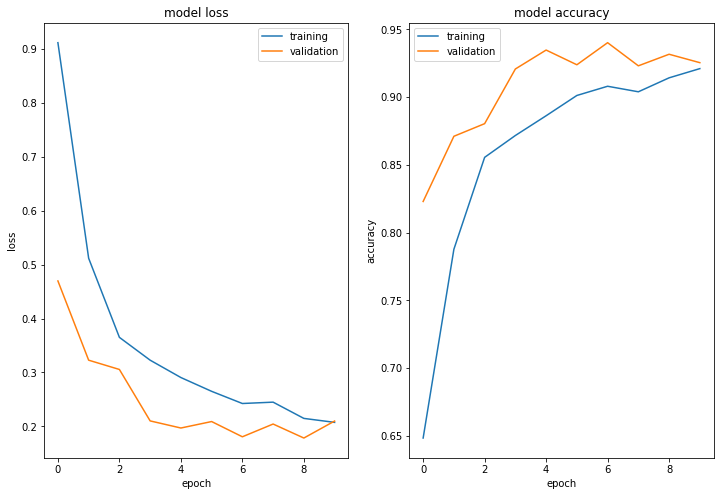

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
  
plt.subplot(1,2,2)
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D())
model.add(Conv2D(64,kernel_size=3,activation='relu',))
model.add(MaxPool2D())
model.add(Conv2D(128,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer=Adam(0.005), loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 64)       

In [ ]:
m = model.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
81/81 [==============================] - 183s 2s/step - loss: 0.7153 - accuracy: 0.6998 - val_loss: 0.4617 - val_accuracy: 0.8020
Epoch 2/20
81/81 [==============================] - 179s 2s/step - loss: 0.4230 - accuracy: 0.8375 - val_loss: 0.3327 - val_accuracy: 0.8657
Epoch 3/20
81/81 [==============================] - 178s 2s/step - loss: 0.3593 - accuracy: 0.8575 - val_loss: 0.3014 - val_accuracy: 0.8657
Epoch 4/20
81/81 [==============================] - 177s 2s/step - loss: 0.2890 - accuracy: 0.8923 - val_loss: 0.2300 - val_accuracy: 0.9270
Epoch 5/20
81/81 [==============================] - 177s 2s/step - loss: 0.2727 - accuracy: 0.8958 - val_loss: 0.2213 - val_accuracy: 0.9099
Epoch 6/20
81/81 [==============================] - 177s 2s/step - loss: 0.2597 - accuracy: 0.9026 - val_loss: 0.2310 - val_accuracy: 0.9154
Epoch 7/20
81/81 [==============================] - 177s 2s/step - loss: 0.2496 - accuracy: 0.9137 - val_loss: 0.1843 - val_accuracy: 0.9286
Epoch 8/20
81

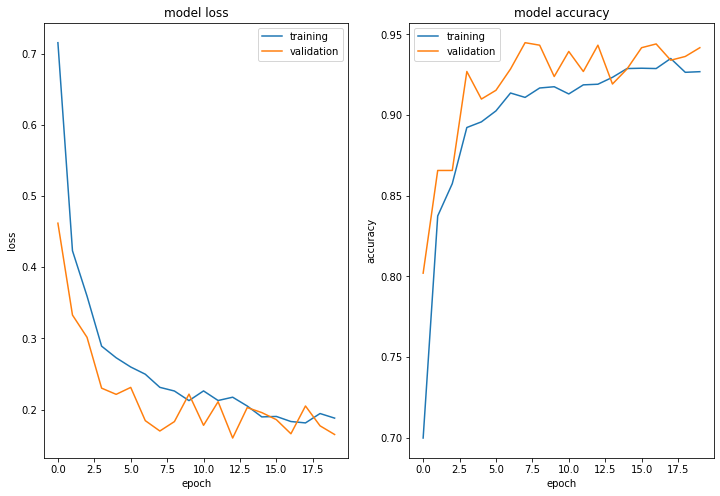

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
  
plt.subplot(1,2,2)
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')